In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
from scipy.stats import norm

In [16]:
acoes = ["SPXI11.SA", "BOVV11.SA", "VALE3.SA", "WEGE3.SA"]
carteira = pd.DataFrame()
for i in acoes:
      carteira[i] = yf.download(i, period='3y')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
pesos = np.array([0.25, 0.25, 0.25, 0.25])
valor = 1000000
retorno = carteira.pct_change()
posicao = valor * pesos
desv = retorno.std()
med = retorno.mean()
cov_matrix = retorno.cov()

In [18]:
port_mean = med @ pesos
port_std = np.sqrt(pesos.T @ cov_matrix @ pesos)

In [19]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x ,port_mean, port_std)

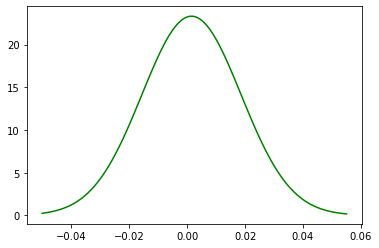

In [20]:
plt.plot(x, norm_dist, color="g")
plt.show()

In [21]:
confidence_level = 0.05
Var = norm.ppf(confidence_level, port_mean, port_std)
Var

-0.026611635670149136

In [22]:
T = range(10)
VaR_T = Var * np.sqrt(T)
VaR_T

array([-0.        , -0.02661164, -0.03763454, -0.04609271, -0.05322327,
       -0.05950543, -0.06518493, -0.07040777, -0.07526907, -0.07983491])

Text(0, 0.5, 'Perda')

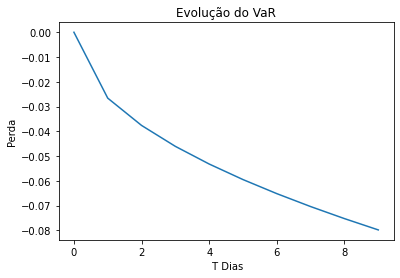

In [53]:
plt.plot(VaR_T)
plt.title("Evolução do VaR")
plt.xlabel(" T Dias")
plt.ylabel('Perda')

In [54]:
ESt = VaR_T * valor
ESt

array([    -0.        , -26611.63567015, -37634.53608166, -46092.70505321,
       -53223.2713403 , -59505.42635091, -65184.92861271, -70407.76996387,
       -75269.07216331, -79834.90701045])

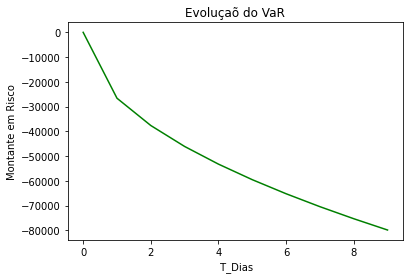

In [55]:
plt.plot(ESt, color = "g")
plt.title("Evolução do VaR")
plt.xlabel(" T_Dias")
plt.ylabel("Montante em Risco")
plt.show()

In [17]:
## função que receba ESt e T como argumentos e retorno o vetor w dos pesos

In [7]:
t = 20

norm.ppf(0.05, df["Retornos"], df["Volatilidade"])

NameError: name 'norm' is not defined

In [5]:
for port_mean, port_std in  df["Retornos"], df["Volatilidade"]:

SyntaxError: unexpected EOF while parsing (<ipython-input-5-80a304bfdee8>, line 1)